In [1]:
import pandas as pd
data=pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data.shape

(918, 12)

In [4]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
df=pd.DataFrame(data)

In [8]:
data_copy=df.copy()

In [9]:
df.duplicated().sum()

0

but as observed in the dataset, the columns BP and cholesterol has some values as 0

In [10]:
column_name = 'Cholesterol'
zero_rows = df[df[column_name] == 0]
print(zero_rows)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y  

In [11]:
len(zero_rows)

172

In [12]:
column_name = 'RestingBP'
zero_rows = data[data[column_name] == 0]

print(zero_rows)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  


In [13]:
import pandas as pd

columns_to_replace = ['RestingBP', 'Cholesterol']

for column in columns_to_replace:
    median_value = df[column].median()
    df[column] = df[column].replace(0, median_value)
    print(f"{column} median = {median_value}")

RestingBP median = 130.0
Cholesterol median = 223.0


The mean and the median of the dataset for both the columns are almost the same.Hnece median is considered

In [14]:
df['Cholesterol'].iloc[293:536]

,Cholesterol
293,223
294,223
295,223
296,223
297,223
...,...
531,306
532,186
533,252
534,222


In [15]:
df['RestingBP'].iloc[449]

130

In [16]:
column_name = 'Cholesterol'
zero_rows = df[df[column_name] == 0]
print(zero_rows)
# 0 values are not present in dataset

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [17]:
df.shape

(918, 12)

In [18]:
print(df['Sex'].unique())

['M' 'F']


In [19]:
df['Sex']=df['Sex'].map({'M':1,'F':0})
df['Sex'].head(20)

,Sex
0,1
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [20]:
print(df['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


ATA:Atypical Typical Angina

NAP:Non-Anginal Pain

ASY:Asymptomatic

TA:Typical Angina

In [21]:
df['ChestPainType']=df['ChestPainType'].map({'ATA':0,'NAP':1,'ASY':2,'TA':3})
df['ChestPainType'].head(10)

,ChestPainType
0,0
1,1
2,0
3,2
4,1
5,1
6,0
7,0
8,2
9,0


In [22]:
print(df['RestingECG'].unique())

['Normal' 'ST' 'LVH']


In [23]:
df['RestingECG']=df['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})
df['RestingECG'].head(10)

,RestingECG
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [24]:
print(df['ExerciseAngina'].unique())

['N' 'Y']


In [25]:
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})
df['ExerciseAngina'].head(10)

,ExerciseAngina
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [26]:
print(df['ST_Slope'].unique())

['Up' 'Flat' 'Down']


In [27]:
df['ST_Slope']=df['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})
df['ST_Slope'].head(10)

,ST_Slope
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-29-082e0b8e97d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='Blues')


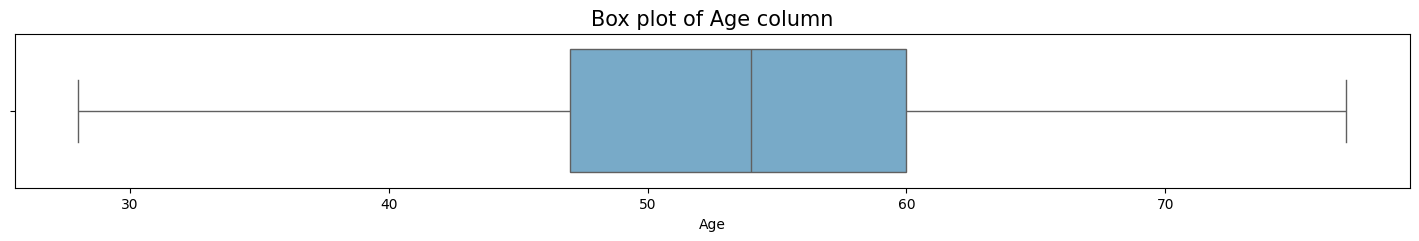

<ipython-input-29-082e0b8e97d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='Blues')


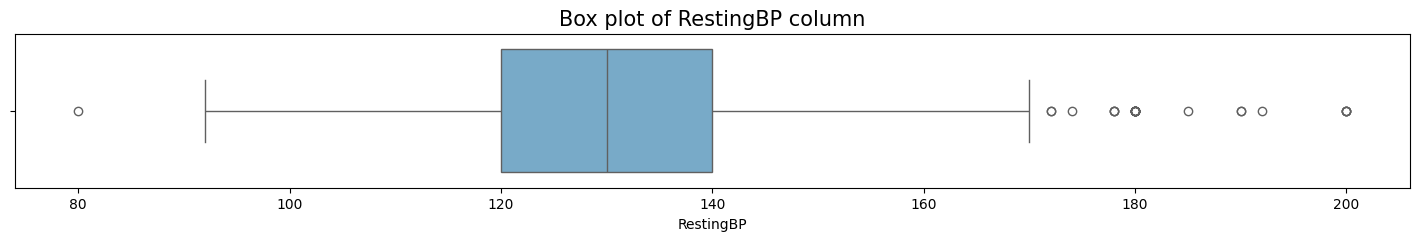

<ipython-input-29-082e0b8e97d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='Blues')


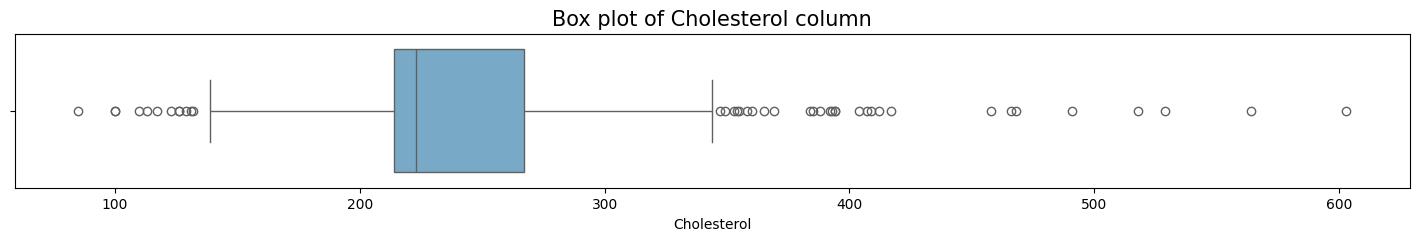

<ipython-input-29-082e0b8e97d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='Blues')


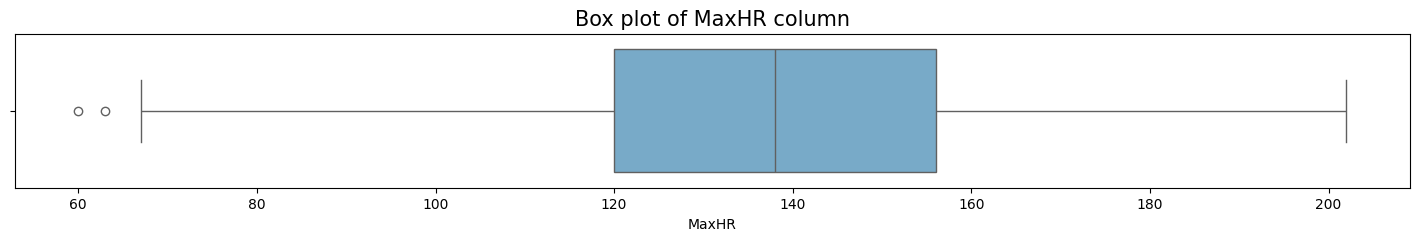

<ipython-input-29-082e0b8e97d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col],palette='Blues')


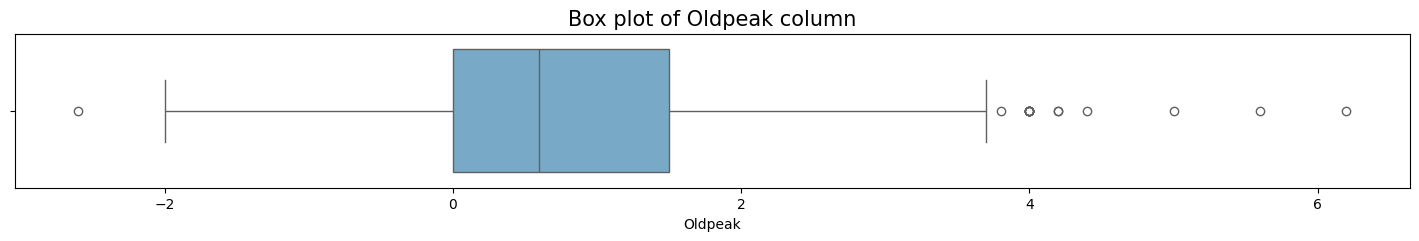

In [29]:
cols=['Age','RestingBP', 'Cholesterol','MaxHR','Oldpeak']
for col in cols:
     plt.figure(figsize=(18,2))
     sns.boxplot(x=df[col],palette='Blues')
     plt.title(f'Box plot of {col} column',fontsize=15)
     plt.show()

In [30]:
for col in cols:
    column=df[col]
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    outliers=column[(column < lower_bound) | (column > upper_bound)]
    num_outliers=len(outliers)
    print(f"Column '{col}' has {num_outliers} outliers.")

Column 'Age' has 0 outliers.
Column 'RestingBP' has 27 outliers.
Column 'Cholesterol' has 41 outliers.
Column 'MaxHR' has 2 outliers.
Column 'Oldpeak' has 16 outliers.


Robust Scaling scales the values by considering the median and IQR, hence it is not sensitive to outliers

In [31]:
import numpy as np
from sklearn.preprocessing import RobustScaler

columns_to_scale = ['Age', 'RestingBP', 'Cholesterol','MaxHR']
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.076923    1              0        0.5     1.245283          0   
1 -0.384615    0              1        1.5    -0.811321          0   
2 -1.307692    1              0        0.0     1.132075          0   
3 -0.461538    0              2        0.4    -0.169811          0   
4  0.000000    1              1        1.0    -0.528302          0   

   RestingECG     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0           0  0.944444               0      0.0         0             0  
1           0  0.500000               0      1.0         1             1  
2           1 -1.111111               0      0.0         0             0  
3           0 -0.833333               1      1.5         1             1  
4           0 -0.444444               0      0.0         0             0  


In [32]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-0.037624,0.789760,1.452070,0.126906,0.331730,0.233115,0.603486,-0.033073,0.404139,0.887364,0.638344,0.553377
std,0.725586,0.407701,0.851832,0.899506,1.018547,0.423046,0.805968,0.707232,0.490992,1.066570,0.607056,0.497414
min,-2.000000,0.000000,0.000000,-2.500000,-2.603774,0.000000,0.000000,-2.166667,0.000000,-2.600000,0.000000,0.000000
25%,-0.538462,1.000000,1.000000,-0.500000,-0.169811,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,1.000000,1.000000
75%,0.461538,1.000000,2.000000,0.500000,0.830189,0.000000,1.000000,0.500000,1.000000,1.500000,1.000000,1.000000
max,1.769231,1.000000,3.000000,3.500000,7.169811,1.000000,2.000000,1.777778,1.000000,6.200000,2.000000,1.000000


In [33]:
df.to_csv('heart_preprocessed.csv', index=False)

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

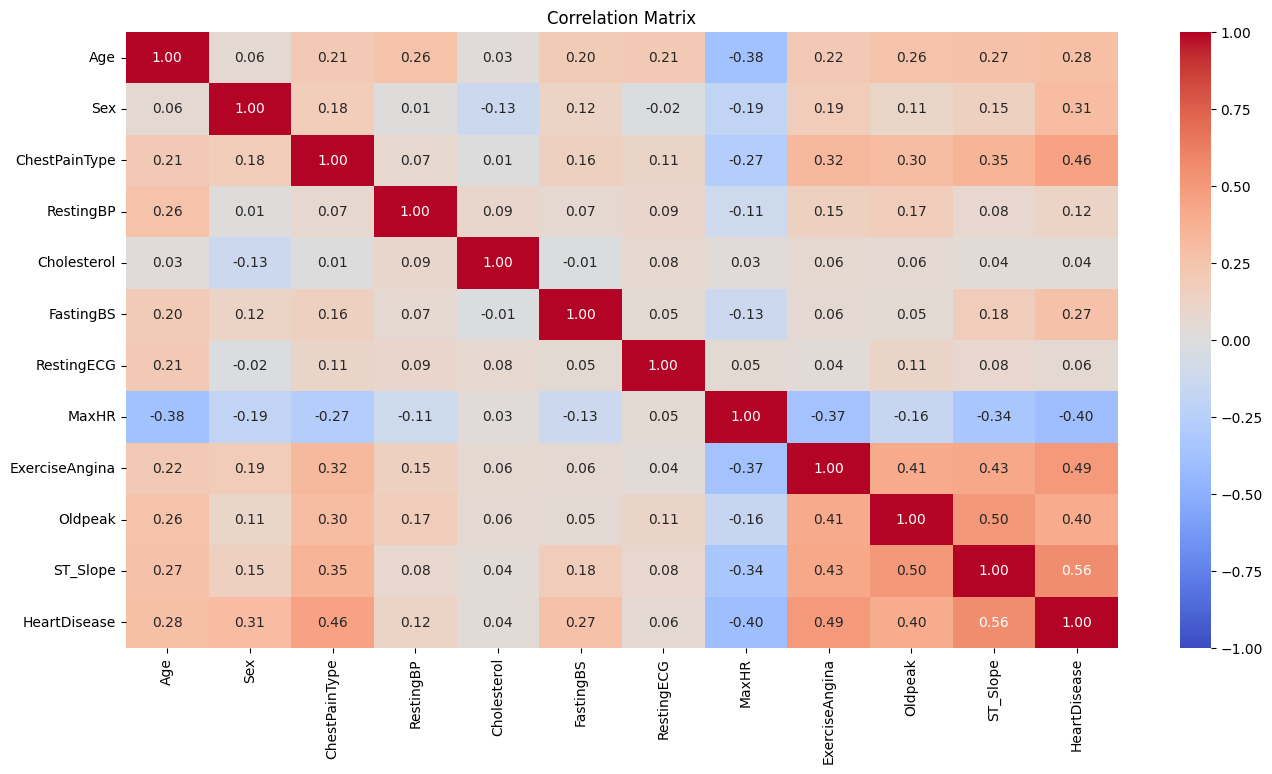

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

HeartDisease likely depends on features like ExerciseAngina, ST_Slope, Max Heart Rate, Oldpeak, and ChestPainType

In [ ]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_df = calculate_vif(df)
print(vif_df)

          Features       VIF
0              Age  1.354786
1              Sex  3.507395
2    ChestPainType  4.312646
3        RestingBP  1.128647
4      Cholesterol  1.121758
5        FastingBS  1.454221
6       RestingECG  1.630282
7            MaxHR  1.415572
8   ExerciseAngina  2.590676
9          Oldpeak  2.581822
10        ST_Slope  3.644364
11    HeartDisease  4.517853


It is observed based on the variance inflation factor, all the features are moderately correlated and it is not necessary to drop any feature

In [ ]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

the data is slightly unbalanced,smote is required

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after applying SMOTE:
HeartDisease
0    508
1    508
Name: count, dtype: int64


In [ ]:
pd.DataFrame(X_resampled).shape

(1016, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)
print("Samples in Training data ", len(X_train))
print("Samples in Testing data ", len(X_test))


Samples in Training data  812
Samples in Testing data  204


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)


y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
y_pred_prob_test = log_reg.predict_proba(X_test)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
roc_auc_val_test = auc(fpr_test, tpr_test)


accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_test:.4f}")
print("Test Set Confusion Matrix:")
print(conf_matrix_test)

print(f"Train Set Accuracy: {accuracy_train:.4f}")

Test Set Accuracy: 0.8578
Test Set Recall: 0.9138
Test Set Precision: 0.8480
Test Set F1 Score: 0.8797
Test Set ROC AUC Score: 0.9115
Test Set Confusion Matrix:
[[ 69  19]
 [ 10 106]]
Train Set Accuracy: 0.8633


SVM

In [ ]:
svm_classifier = SVC(probability=True, random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_test = svm_classifier.predict(X_test)
y_pred_train = svm_classifier.predict(X_train)
y_pred_prob_test = svm_classifier.predict_proba(X_test)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
roc_auc_val_test = auc(fpr_test, tpr_test)

accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_test:.4f}")
print("Test Set Confusion Matrix:")
print(conf_matrix_test)

print(f"Train Set Accuracy: {accuracy_train:.4f}")

Test Set Accuracy: 0.8382
Test Set Recall: 0.8793
Test Set Precision: 0.8430
Test Set F1 Score: 0.8608
Test Set ROC AUC Score: 0.9264
Test Set Confusion Matrix:
[[ 69  19]
 [ 14 102]]
Train Set Accuracy: 0.8978


KNN

KNN Test Set Accuracy: 0.8529
KNN Test Set Recall: 0.8879
KNN Test Set Precision: 0.8583
KNN Test Set F1 Score: 0.8729
KNN Test Set ROC AUC Score: 0.9274
KNN Test Set Confusion Matrix:
[[ 71  17]
 [ 13 103]]
KNN Train Set Accuracy: 0.9015


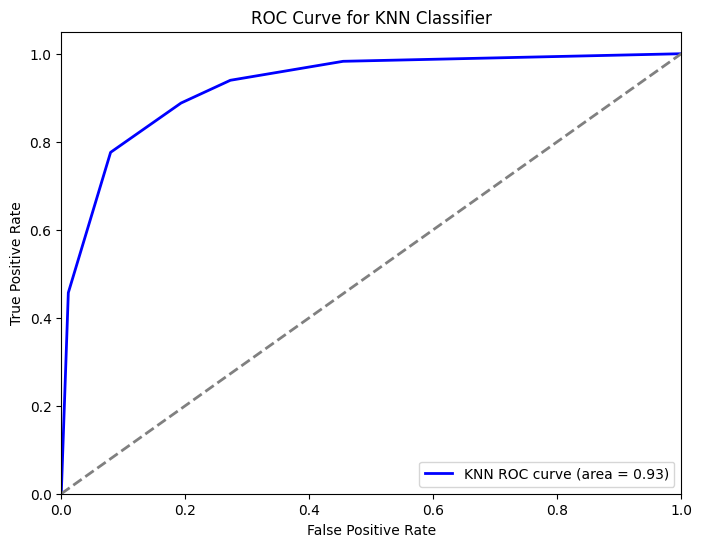

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_test_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)
y_pred_prob_test_knn = knn.predict_proba(X_test)[:, 1]

accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)
roc_auc_test_knn = roc_auc_score(y_test, y_pred_prob_test_knn)
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)

accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)

print(f"KNN Test Set Accuracy: {accuracy_test_knn:.4f}")
print(f"KNN Test Set Recall: {recall_test_knn:.4f}")
print(f"KNN Test Set Precision: {precision_test_knn:.4f}")
print(f"KNN Test Set F1 Score: {f1_test_knn:.4f}")
print(f"KNN Test Set ROC AUC Score: {roc_auc_test_knn:.4f}")
print("KNN Test Set Confusion Matrix:")
print(conf_matrix_test_knn)

print(f"KNN Train Set Accuracy: {accuracy_train_knn:.4f}")

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_test_knn)
roc_auc_val_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (area = {roc_auc_val_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST

In [ ]:
rfc=RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.897
The precision on test data is  0.905
The recall on test data is  0.913
The f1 on test data is  0.909
The roc_score on test data is  0.895
[[ 78  10]
 [ 11 105]]


Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)

y_pred_test = best_rfc.predict(X_test)
y_pred_train = best_rfc.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:, 1])
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_test:.4f}")
print("Test Set Confusion Matrix:")
print(conf_matrix_test)

print(f"Train Set Accuracy: {accuracy_train:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Accuracy: 0.8824
Test Set Recall: 0.8966
Test Set Precision: 0.8966
Test Set F1 Score: 0.8966
Test Set ROC AUC Score: 0.9422
Test Set Confusion Matrix:
[[ 76  12]
 [ 12 104]]
Train Set Accuracy: 0.9618
